In [60]:
%%capture
%run final_chars_classification.ipynb



NameError: name 'letters_res' is not defined

NameError: name 'letters_res' is not defined

In [ ]:
%run table_detector.ipynb

In [ ]:
%run final_functions.ipynb

In [ ]:
%run preprocessing.ipynb

In [ ]:
%run get_rows_number.ipynb

In [ ]:
# initialize_models(True)
load_models()

In [ ]:
from tabular import tabular

In [ ]:
def solve_expression(img, is_table = False, showTrace = False):
    
    img = cv2.resize(img, (2448, 3264)) # size of A4
    img = img.astype(np.uint8)
    img = preprocessing(img, False)
    if showTrace:
        show_images([img])

    if(is_table):
        # show_images([table_tany(img)])
        # table_tany(img)
        cells, col_num, row_num = box_extraction(img, showTrace= showTrace)#, table= True)

        letters = [classify(i, is_letter=True) for i in cells[0:col_num]]
        numbers = [classify(i, is_0_1=True) for i in cells[col_num:]]
        
        numbers = [int(i) for i in numbers]
        
        if showTrace:
            print(letters)
            print(numbers)
            print('cols numbers ' + str(col_num))
        
        
        solver = tabular.McCluskey()
        solver.solve(numbers,col_num)
        
        solver.logic()
        

    else: 

        expression_rows = get_rows_number(img)
        
        if showTrace:
            show_images(expression_rows)
        expressions = [classify(i, is_expression=True, verbose=showTrace) for i in expression_rows ]
        
        if showTrace: print(expressions)
        return [get_table(expression) for expression in expressions]

    

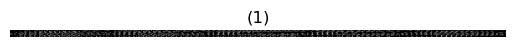

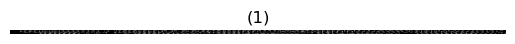

['A' '=' '~' 'B' '+' 'C' '(' 'D' 'xor' 'E' ')' '+' 'F']
~ B or C and ( D xor E ) or F 
['D' '=' 'D' '+' 'C' '+' 'A']
D or C or A 
+-----+-----+-----+----------------------------------+
|  B  |  F  |  C  |  ~ B or C and ( D xor E ) or F   |
|-----+-----+-----+----------------------------------|
|  1  |  1  |  1  |                1                 |
|  1  |  1  |  0  |                1                 |
|  1  |  0  |  1  |                0                 |
|  1  |  0  |  0  |                0                 |
|  0  |  1  |  1  |                1                 |
|  0  |  1  |  0  |                1                 |
|  0  |  0  |  1  |                1                 |
|  0  |  0  |  0  |                1                 |
+-----+-----+-----+----------------------------------+
+-----+-----+----------------+
|  A  |  C  |  D or C or A   |
|-----+-----+----------------|
|  1  |  1  |       1        |
|  1  |  0  |       1        |
|  0  |  1  |       1        |
|  0  |  0  |       0   

In [ ]:
image = cv2.imread("./test_images/classification/AllKO.jpg")

result = solve_expression(image, is_table=False)

for r in result: 
    print(r)


